In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 

In [3]:
def load_model_results(file_name):
    file = np.load(file_name)
    predictions = file["predictions"]
    targets = file["targets"][:, 0]
    pred_mean = file["prediction_mean"]
    pred_std = file["prediction_std"]
    resids = targets - pred_mean

    return predictions, pred_mean, pred_std, targets, resids

dtype = "validation"
model1_file = f"../ensembles/seed1_128_0.05_3e-4_0.01/swag_{dtype}_uncertainty.npz"
model2_file = f"../ensembles/seed2_128_0.05_3e-4_0.01/swag_{dtype}_uncertainty.npz"
model3_file = f"../ensembles/seed3_128_0.05_3e-4_0.01/swag_{dtype}_uncertainty.npz"

model1_preds, model1_pred_mean, model1_pred_std, model1_targets, model1_resids = load_model_results(model1_file)
model2_preds, model2_pred_mean, model2_pred_std, model2_targets, model2_resids = load_model_results(model2_file)
model3_preds, model3_pred_mean, model3_pred_std, model3_targets, model3_resids = load_model_results(model3_file)

combined_predictions = np.concatenate([model1_preds, model2_preds, model3_preds], axis=1)
combined_means = np.mean(combined_predictions, axis=1)
combined_stds = np.std(combined_predictions, axis=1)
assert np.array_equal(model1_targets, model2_targets)
assert np.array_equal(model1_targets, model3_targets)
combined_residuals = model1_targets - combined_means
residual_mean = np.mean(combined_residuals)
residual_std = np.std(combined_residuals)

# Visualize $\sigma$ and residuals

Text(0, 0.5, 'Density')

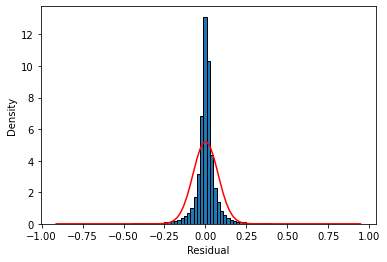

In [3]:
bins = np.arange(np.min(combined_residuals), np.max(combined_residuals)+0.02, 0.02)
plt.hist(combined_residuals, bins=bins, 
         edgecolor='k', linewidth=1.0, density=True);
plt.plot(bins, norm.pdf(bins, residual_mean, residual_std), color="r")
plt.xlabel("Residual")
plt.ylabel("Density")

(0.0, 1.05)

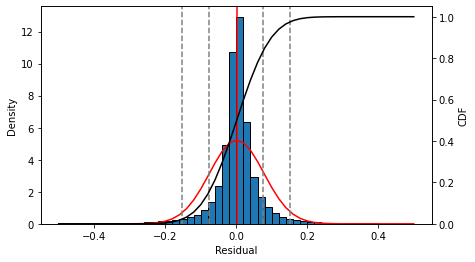

In [4]:
bins = np.arange(-0.5, 0.52, 0.02)
#bins = np.arange(-1.0, 1.02, 0.02)

fix, ax = plt.subplots(1, figsize=(7, 4))
ax.hist(combined_residuals, bins=bins, 
         edgecolor='k', linewidth=1.0, density=True);
ax.plot(bins, norm.pdf(bins, residual_mean, residual_std), color="r")

#plt.plot(np.arange(-0.5, 0.51, 0.005), norm.pdf(np.arange(-0.5, 0.51, 0.005), residual_mean, 0.5*residual_std), color="k")

ax.axvline(residual_std, color='gray', linestyle="--")
ax.axvline(-residual_std, color='gray', linestyle="--")
ax.axvline(2*residual_std, color='gray', linestyle="--")
ax.axvline(-2*residual_std, color='gray', linestyle="--")
ax.axvline(residual_mean, color="r")
ax.set_xlabel("Residual")
ax.set_ylabel("Density")

ax1 = ax.twinx()
ax1.plot(bins, norm.cdf(bins, residual_mean, residual_std), color="k")
ax1.set_ylabel("CDF")
ax1.set_ylim([0, 1.05])

Text(0.5, 0, 'STD')

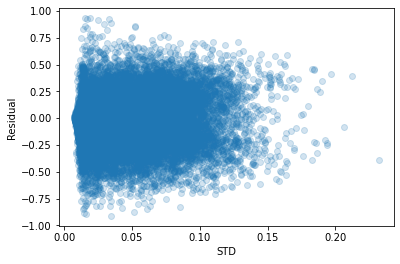

In [5]:
plt.scatter(combined_stds, combined_residuals, alpha=0.2)
plt.ylabel("Residual")
plt.xlabel("STD")

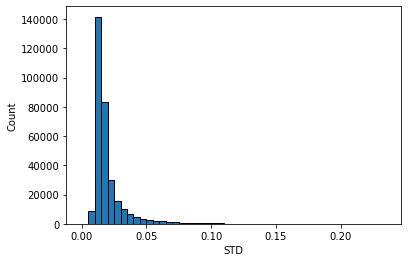

In [6]:
bins = np.arange(0, np.max(combined_stds)+0.005, 0.005)
plt.hist(combined_stds, bins=bins, edgecolor="k");
plt.xlabel("STD");
plt.ylabel("Count");

In [7]:
print(np.min(combined_stds), np.max(combined_stds))

0.00728956825858932 0.23193377454664546


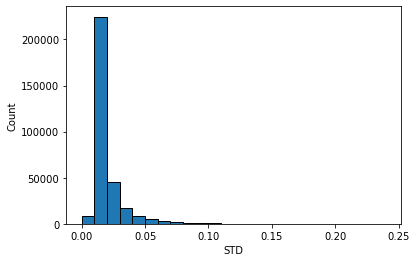

In [8]:
bins = np.arange(0, np.max(combined_stds)+0.01, 0.01)
plt.hist(combined_stds, bins=bins, edgecolor="k");
plt.xlabel("STD");
plt.ylabel("Count");

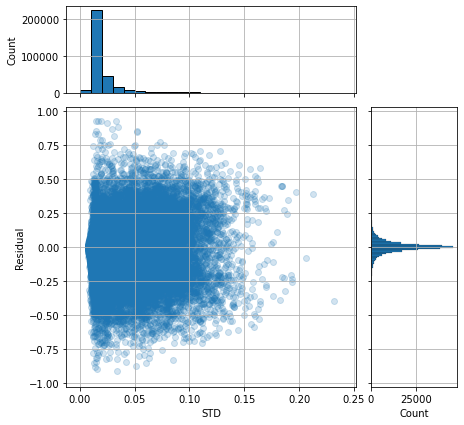

In [9]:
# https://matplotlib.org/stable/gallery/axes_grid1/scatter_hist_locatable_axes.html#sphx-glr-gallery-axes-grid1-scatter-hist-locatable-axes-py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(7, 7))

x = combined_stds 
y = combined_residuals

# the scatter plot:
ax.scatter(x, y, alpha=0.2)

# create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1.2, pad=0.2, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.2, sharey=ax)

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

# now determine nice limits by hand:
binwidth = 0.01
xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
lim = (int(xymax/binwidth))*binwidth

bins_x = np.arange(0,  np.max(x)+ binwidth, binwidth)
bins_y = np.arange(-np.max(np.abs(y)), np.max(np.abs(y))+ binwidth, binwidth)

ax_histx.hist(x, bins=bins_x, edgecolor="k")
ax_histy.hist(y, bins=bins_y, orientation='horizontal', edgecolor="k", linewidth=0.15)

ax.grid(True)
ax_histx.grid(True)
ax_histy.grid(True)

#ax_histy.set_xticks(np.arange(0, 5201, 2000))
ax_histy.set_xlabel("Count")
ax_histx.set_ylabel("Count")

ax.set_ylabel("Residual")
ax.set_xlabel("STD")
plt.show()

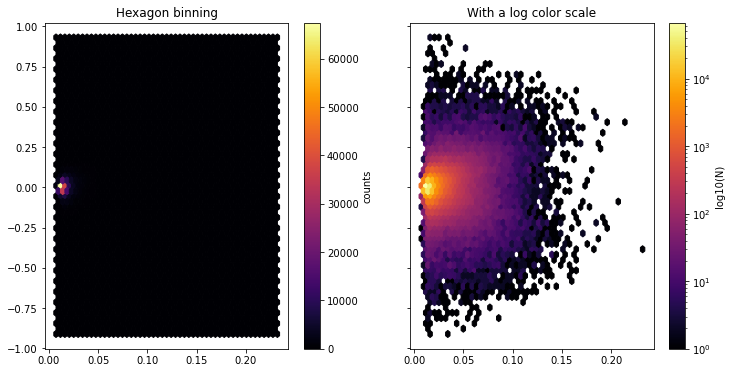

In [10]:
# https://matplotlib.org/stable/gallery/statistics/hexbin_demo.html
fig, (ax0, ax1) = plt.subplots(ncols=2, sharey=True, figsize=(12, 6))

hb = ax0.hexbin(x, y, gridsize=50, cmap='inferno')
# ax0.set(xlim=xlim, ylim=ylim)
ax0.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax0, label='counts')

hb = ax1.hexbin(x, y, gridsize=50, bins='log', cmap='inferno', mincnt=1)
# ax1.set(xlim=xlim, ylim=ylim)
ax1.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax1, label='log10(N)')

plt.show()

# Bin $\sigma$

In [11]:
import seaborn as sns

In [12]:
df_data = {"std":combined_stds, "mean":combined_means, "residual":combined_residuals}
df = pd.DataFrame(data=df_data)
df.head()

,std,mean,residual
0,0.017737,-0.430377,-0.009623
1,0.011969,0.272362,-0.002362
2,0.013719,-0.295417,0.005417
3,0.012285,-0.038830,-0.041170
4,0.011783,0.193131,0.016869


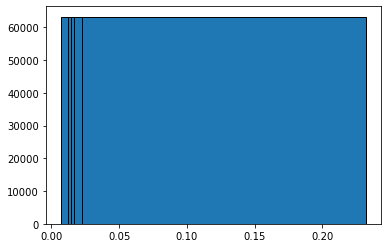

(array([0.00728957, 0.01219602, 0.01419694, 0.01670823, 0.0229343 ,
        0.23193377]),
 array([63293., 63292., 63292., 63292., 63292.]))

In [13]:
n_bins = 5

## https://www.statology.org/equal-frequency-binning-python/
#define function to calculate equal-frequency bins 
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins 
n, bins, patches = plt.hist(df["std"], equalObs(df["std"], n_bins), edgecolor='black')
plt.show()

#display bin boundaries and frequency per bin 
bins, n

In [14]:
df_cats, bins = pd.cut(df["std"], bins=bins, labels=range(n_bins), retbins=True, include_lowest=True)
df["std_cat"] = df_cats.values
df_cats

0         3
1         0
2         1
3         1
4         0
         ..
316456    1
316457    1
316458    3
316459    4
316460    1
Name: std, Length: 316461, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

<AxesSubplot:xlabel='std_cat', ylabel='residual'>

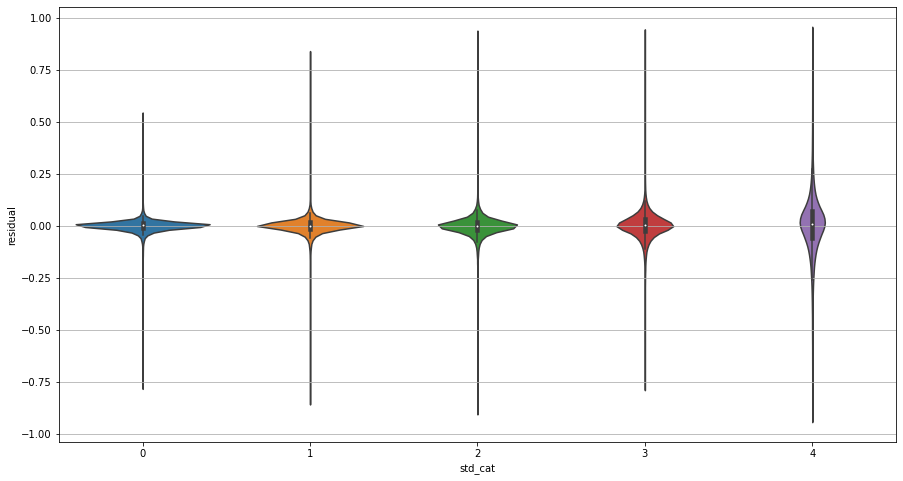

In [15]:
fig, ax = plt.subplots(1, figsize=(15, 8))
ax.grid(True)
sns.violinplot(y=df["residual"], x=df["std_cat"], ax=ax) #, scale="width")
#plt.xticks(rotation=45);

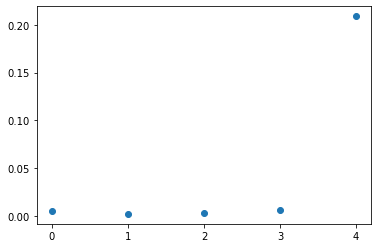

In [16]:
widths = []
for ind in range(len(bins)-1):
    widths.append(bins[ind+1]-bins[ind])
    
plt.scatter(range(n_bins), widths)
plt.xticks(range(n_bins));

# Find $\alpha$ for bins

In [17]:
# Find the percentage of true picks that are within the STD
df.groupby("std_cat").apply(lambda x: (((x["std"]-abs(x.residual)) > 0).sum())/len(x))

std_cat
0    0.465770
1    0.441967
2    0.407729
3    0.350913
4    0.274948
dtype: float64

In [18]:
# Count the number of additional picks needed for 68% of the true picks to be within 1 std
df.groupby("std_cat").apply(lambda x: np.ceil(len(x)*0.68-(((x["std"]-abs(x.residual)) > 0).sum())))

std_cat
0    13560.0
1    15066.0
2    17233.0
3    20829.0
4    25637.0
dtype: float64

In [19]:
# make a column for std/residual => corresponds to how much the std would need to scale to include the true pick
df["std_frac"] = abs(df["residual"])/df["std"]

In [20]:
# grab stds that need to be larger, sort by std_frac, get the rows corresponding to the needed number of additional picks to have 68% of picks 
df_alpha = df.groupby("std_cat").apply(lambda x: (x[x["std_frac"] > 1].sort_values("std_frac")).iloc[int(np.ceil(len(x)*0.68-(x["std_frac"] < 1).sum()))])

In [22]:
alphas = df_alpha["std_frac"].values
alphas

array([1.66901919, 1.83779417, 2.01904533, 2.43106813, 2.82878457])

In [23]:
df.groupby("std_cat").apply(lambda x: (((x["std"]*alphas[x["std_cat"].unique()[0]]-abs(x.residual)) > 0).sum())/len(x))

std_cat
0    0.680012
1    0.680007
2    0.680023
3    0.680007
4    0.680007
dtype: float64

# Accurate Uncertainties for Deep Learning Using Calibrated Regression
1. Compute CDF $F_t$ of $N(\mu_t, \sigma^2_t)$ for t $\in$ [1, T]
2. Evalute $F_t(y_t)$ for t $\in$ [1, T]
3. $F_t(y_t)=p$ for t $\in$ [1, T], compute $\frac{| \{y_t | F_t(y_t) \leq p, t=1...,T \}|}{T}$

In [30]:
df["y_t"] = model1_targets

In [32]:
df

,std,mean,residual,std_cat,std_frac,y_t
0,0.017737,-0.430377,-0.009623,3,0.542548,-0.44
1,0.011969,0.272362,-0.002362,0,0.197310,0.27
2,0.013719,-0.295417,0.005417,1,0.394866,-0.29
3,0.012285,-0.038830,-0.041170,1,3.351288,-0.08
4,0.011783,0.193131,0.016869,0,1.431645,0.21
...,...,...,...,...,...,...
316456,0.013244,-0.236123,-0.003877,1,0.292761,-0.24
316457,0.013011,-0.393518,-0.096482,1,7.415613,-0.49
316458,0.016900,0.434816,0.035184,3,2.081903,0.47
316459,0.039421,0.311520,0.098480,4,2.498153,0.41


In [36]:
df["cdf_yt"] = df.apply(lambda x: norm.cdf(x["y_t"], x["mean"], x["std"]), axis=1)

<AxesSubplot:>

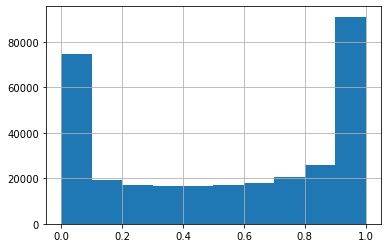

In [39]:
df.cdf_yt.hist()

In [62]:
p_hat = []
T = len(df)
for index, row in df.iterrows():
    p = row["cdf_yt"]
    p_hat.append((df["cdf_yt"] <= p).sum()/T)
df["p_hat"] = p_hat

Text(0.5, 0, 'Predicted')

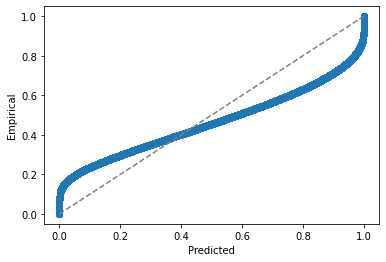

In [84]:
plt.plot(np.arange(0, 1.01, 0.1), np.arange(0, 1.01, 0.1), color="gray", linestyle="--")
plt.scatter(df.cdf_yt.values, df.p_hat.values, alpha=0.1)
plt.ylabel("Empirical")
plt.xlabel("Predicted")

In [71]:
from sklearn.isotonic import IsotonicRegression

In [133]:
iso_reg = IsotonicRegression().fit(df.p_hat.values, df.cdf_yt.values)

In [134]:
p_hat_cal = []
p_hat_uncal = []
for p in np.arange(0, 1.05, 0.05):
    p_hat_cal.append((df["cdf_yt"] <= iso_reg.predict([p])[0]).sum()/T)
    p_hat_uncal.append((df["cdf_yt"] <= p).sum()/T)

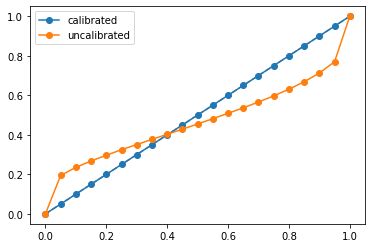

In [135]:
plt.plot(np.arange(0, 1.05, 0.05), np.arange(0, 1.05, 0.05), color="gray", linestyle="--")
plt.plot(np.arange(0, 1.05, 0.05), p_hat_cal, marker="o", label="calibrated")
plt.plot(np.arange(0, 1.05, 0.05), p_hat_uncal, marker="o", label="uncalibrated")
plt.legend()

In [137]:
cal_data = {"uncal":np.arange(0, 1.05, 0.05), "cal":iso_reg.predict(np.arange(0, 1.05, 0.05))}
cal_df = pd.DataFrame(cal_data)
cal_df

,uncal,cal
0,0.00,NaN
1,0.05,0.000003
2,0.10,0.001448
3,0.15,0.015808
4,0.20,0.055380
5,0.25,0.121928
6,0.30,0.205787
7,0.35,0.298339
8,0.40,0.394442
9,0.45,0.490665


- use different datasets for fitting/testing calibration 
- make calbration plot using $\alpha$ values

In [138]:
df.cdf_yt.describe()

count    316461.000000
mean          0.535029
std           0.383613
min           0.000000
25%           0.121929
50%           0.584200
75%           0.934940
max           1.000000
Name: cdf_yt, dtype: float64

# Quantile Regression

In [36]:
from sklearn.linear_model import QuantileRegressor

n_train = 1000
rng = np.random.default_rng(12345)
inds = rng.choice(combined_stds.shape[0], size=n_train, replace=False)
X = combined_stds[inds].reshape(-1, 1)
#X = np.append(X, X**2, axis=1)
y_act = combined_residuals[inds]
out_bounds_predictions = np.zeros_like(inds, dtype=np.bool_)

quantiles = [0.16, 0.84]
#quantiles = [0.05, 0.95]
predictions = {}
models = {}

for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0)
    y_pred = qr.fit(X, y_act).predict(X)
    predictions[quantile] = y_pred
    models[quantile] = qr
    
    if quantile == min(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred >= y_act
    )
    elif quantile == max(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred <= y_act
        )

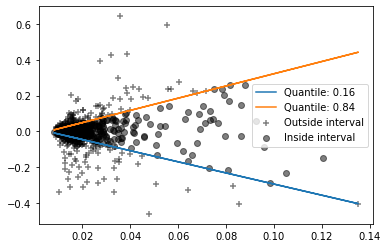

In [38]:
#plt.scatter(X, y_act, color="black", linestyle="dashed", label="True mean")

for quantile, y_pred in predictions.items():
    plt.plot(X, y_pred, label=f"Quantile: {quantile}")
    
plt.scatter(
    X[out_bounds_predictions],
    y_act[out_bounds_predictions],
    color="black",
    marker="+",
    alpha=0.5,
    label="Outside interval",
)
plt.scatter(
    X[~out_bounds_predictions],
    y_act[~out_bounds_predictions],
    color="black",
    alpha=0.5,
    label="Inside interval",
)

plt.legend()

In [49]:
point = np.array([0.02]).reshape(-1, 1)
lb = models[0.16].predict(point)
ub = models[0.84].predict(point)
ub-lb